In [12]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import dijkstra, floyd_warshall
import matplotlib.pyplot as plt

In [13]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def construct_distance_matrix(data):
    n = len(data)
    distance_matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            distance_matrix[i, j] = euclidean_distance(data[i], data[j])
            distance_matrix[j, i] = distance_matrix[i, j]
    return distance_matrix

In [14]:
def construct_adjacency_matrix(distance_matrix, method, k=None, epsilon=None):
    n = distance_matrix.shape[0]
    adjacency_matrix = np.zeros((n, n))
    if method == 'knn':
        for i in range(n):
            indices = np.argsort(distance_matrix[i])[:k+1]
            adjacency_matrix[i, indices] = 1
            adjacency_matrix[indices, i] = 1
    elif method == 'epsilon-ball':
        adjacency_matrix[distance_matrix <= epsilon] = 1
    else:
        raise ValueError("Invalid method. Choose either 'knn' or 'epsilon-ball'.")
    return adjacency_matrix

In [4]:
def construct_shortest_path_matrix(adjacency_matrix, algorithm):
    n = adjacency_matrix.shape[0]
    if algorithm == 'dijkstra':
        adjacency_matrix_sparse = csr_matrix(adjacency_matrix)
        shortest_path_matrix = dijkstra(adjacency_matrix_sparse, directed=False)
    elif algorithm == 'floyd-warshall':
        shortest_path_matrix = floyd_warshall(adjacency_matrix, directed=False)
    else:
        raise ValueError("Invalid algorithm. Choose either 'dijkstra' or 'floyd-warshall'.")
    return shortest_path_matrix

In [37]:
def isomap(data, method='knn', k=None, epsilon=None, n_components=2, algorithm='dijkstra'):
    distance_matrix = construct_distance_matrix(data)
    adjacency_matrix = construct_adjacency_matrix(distance_matrix, method, k, epsilon)
    shortest_path_matrix = construct_shortest_path_matrix(adjacency_matrix, algorithm)
    
    n = data.shape[0]
    centering_matrix = np.eye(n) - np.ones((n, n)) / n
    gram_matrix = -0.5 * centering_matrix.dot(shortest_path_matrix ** 2).dot(centering_matrix)
    
    eigenvalues, eigenvectors = np.linalg.eigh(gram_matrix)
    indices = np.argsort(eigenvalues)[::-1][:n_components]
    components = eigenvectors[:, indices]

    return components

# Example usage:
def create_swiss_roll(n_samples, noise):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = t * np.cos(t)
    y = t * np.sin(t)
    z = x + noise * np.random.randn(n_samples)
    return np.c_[x, y, z]


# Create a swiss roll dataset
data = create_swiss_roll(1000, 10)
y = np.random.randint(0, 3, 1000)


method = 'knn'  # Choose either 'knn' or 'epsilon-ball'
k = 7  # Only used if method is 'knn'
epsilon = 5  # Only used if method is 'epsilon-ball'
n_components = 2
algorithm = 'dijkstra'  # Choose either 'dijkstra' or 'floyd-warshall'
reduced_data = isomap(data, method, k, epsilon, n_components, algorithm)

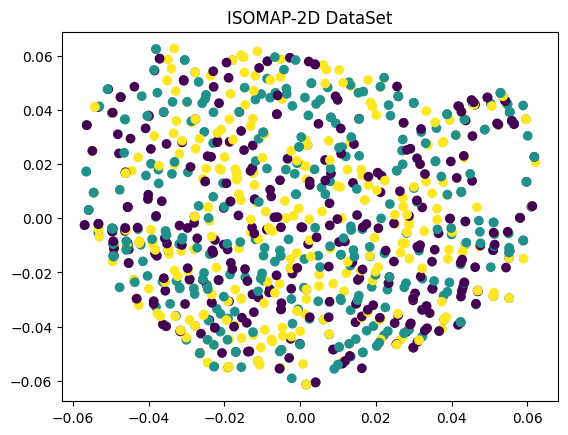

In [31]:
fig = plt.figure()
ax0 = fig.add_subplot(111)
plt.title("ISOMAP-2D DataSet")
ax0.scatter(reduced_data[:, 0], reduced_data[:, 1] , c = y)

C:\Users\Hoseyn\AppData\Local\Temp\ipykernel_1152\739679459.py:7: RuntimeWarning: divide by zero encountered in divide
  u = 1 / k


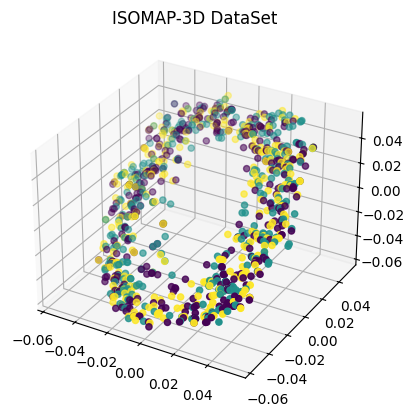

In [38]:
def create_swiss_roll(n_samples, noise):
    t = np.linspace(0, 2 * np.pi, n_samples)
    x = t * np.cos(t)
    y = t * np.sin(t)
    z = x + noise * np.random.randn(n_samples)
    k = t * np.tan(t)
    u = 1 / k
    return np.c_[x, y, z,k,u]


# Create a swiss roll dataset
data = create_swiss_roll(1000, 10)

reduced_data = isomap(data, method, 8, epsilon, 3 , algorithm)

fig = plt.figure()
ax0 = fig.add_subplot(111 , projection = '3d')
plt.title("ISOMAP-3D DataSet")
ax0.scatter(reduced_data[:, 0], reduced_data[:, 1] ,reduced_data[:, 1], c = y)

In [ ]:
ax0.scatter(data[:, 0], data[:, 1] ,data[:, 1], c = y)

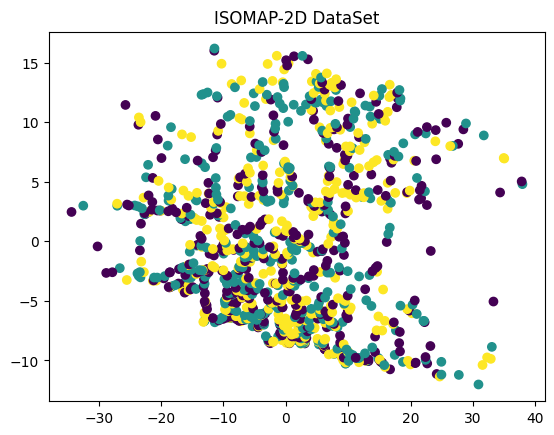

In [32]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import Isomap


# Step 1: Compute pairwise distances
neigh = NearestNeighbors(n_neighbors=7)
neigh.fit(data)
distances, indices = neigh.kneighbors(data)

# Step 2: Create the Isomap embedding
n_components = 2  # Number of dimensions for the embedding
isomap = Isomap(n_components=n_components)
embedding = isomap.fit_transform(data)

# Plot the reduced data
fig = plt.figure()
ax1 = fig.add_subplot(111)
plt.title("ISOMAP-2D DataSet")
ax1.scatter(embedding[:, 0], embedding[:, 1] , c = y)